# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path
import statsmodels.formula.api as smf

In [95]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
path = 'processed.cleveland.csv'

if os.path.isfile(path):
    df = pd.read_csv(path)
else:
    cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    df = pd.read_csv(url, names=cols)
    df.to_csv(path, index=False)
    
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [96]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [97]:
# Função para fazer os cálculos no DataFrame
def calcular(data: pd.DataFrame) -> None:
    
    # Quantidade média de doentes
    data['percent_doentes'] = data[1] / data['All']
    
    # Odds
    data['odds'] = data[1] / data[0]
    
    # Odds ratio (Use o total como referência)
    data['odds_ratio'] = data[1] / data.loc['All', 1]
    
    # Logito (LOG(Odds))
    data['logito'] = np.log(data['odds'])
    
    # O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE)
    data['log_odds_ratio'] = np.log(data['odds_ratio'])


In [98]:
# bivariada para a variável sex com Número de saudáveis, Número de doentes e Total
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

In [99]:
calcular(tab)

In [100]:
tab

flag_doente,0,1,All,percent_doentes,odds,odds_ratio,logito,log_odds_ratio
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.179856,-1.057790,-1.715598
1.0,92,114,206,0.553398,1.239130,0.820144,0.214410,-0.198275
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [101]:
# Categorize a variável em 5 grupos

df['idades'] = pd.qcut(df['age'], 5)

In [102]:
#  bivariada para a variável age por categoria

age = pd.crosstab(df['idades'], df['flag_doente'], margins=True)

In [103]:
# Calcule as mesmas quantidades calculadas no execício anterior
calcular(age)

In [106]:
# Calcule também o valor médio da variável age

medias = df[['age', 'idades']].groupby('idades').mean()
medias.loc['All'] = df['age'].mean()

In [107]:
# adicionando as médias no DataFrame age
age['media_idade'] = medias

In [108]:
age

flag_doente,0,1,All,percent_doentes,odds,odds_ratio,logito,log_odds_ratio,media_idade
idades,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.115108,-1.077559,-2.161885,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.158273,-0.646627,-1.843431,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,0.280576,0.197826,-1.270912,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,0.230216,0.900787,-1.468738,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,0.215827,0.000000,-1.533277,66.516667
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

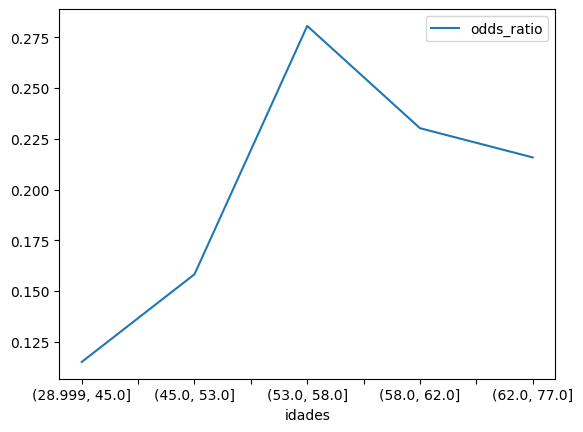

In [119]:
_ = age.drop('All', inplace=False).plot(kind='line', y='odds_ratio')